In [1]:
# install.packages("dplyr")
# install.packages("fastDummies")
# install.packages("tidyverse")
# install.packages("kableExtra")
# install.packages('GGally')
# install.packages("corrplot")
library(corrplot)
library(GGally)
library(dplyr)
library(fastDummies)
library(tidyverse)
library(openintro)
library(corrr)
library(knitr)
library(kableExtra)
library(IRdisplay)
library(ggplot2)


The downloaded binary packages are in
	/var/folders/s7/6ncckdrj32j81xfl9hjxkzkr0000gn/T//Rtmpwi8mYR/downloaded_packages

The downloaded binary packages are in
	/var/folders/s7/6ncckdrj32j81xfl9hjxkzkr0000gn/T//Rtmpwi8mYR/downloaded_packages

The downloaded binary packages are in
	/var/folders/s7/6ncckdrj32j81xfl9hjxkzkr0000gn/T//Rtmpwi8mYR/downloaded_packages

The downloaded binary packages are in
	/var/folders/s7/6ncckdrj32j81xfl9hjxkzkr0000gn/T//Rtmpwi8mYR/downloaded_packages

The downloaded binary packages are in
	/var/folders/s7/6ncckdrj32j81xfl9hjxkzkr0000gn/T//Rtmpwi8mYR/downloaded_packages

The downloaded binary packages are in
	/var/folders/s7/6ncckdrj32j81xfl9hjxkzkr0000gn/T//Rtmpwi8mYR/downloaded_packages


corrplot 0.94 loaded

Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
✔ readr     2.1.5     
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted 

ERROR: Error in library(tidymodels): there is no package called ‘tidymodels’


In [2]:
data <- read.csv('Trabajo Práctico 1/Datasets/eph_train_2023.csv')%>% 
                            mutate(id = 1:nrow(.))

head(data)

,codusu,ano4,trimestre,region,aglomerado,fecha_nacimiento,edad,asistencia_educacion,nivel_ed,tipo_establecimiento,⋯,sexo,categoria_ocupacion,cat_cantidad_empleos,alfabetismo,salario,horas_trabajadas,educacion,experiencia_potencial,salario_horario,id
,<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<int>
1,TQRMNOPYRHJMKPCDEIGED00785098,2023,3,Pampeana,30,01/01/1900,30,asistio,Secundaria Incompleta,Privada,⋯,Mujer,Obrero o empleado,unico,Sabe leer y escribir,48000,15,10,15,800.0000,1
2,TQRMNOQRXHKMLOCDEHLEH00790365,2023,3,Noroeste,25,01/01/1900,28,asistio,Secundaria Completa,Estatal,⋯,Varon,Obrero o empleado,unico,Sabe leer y escribir,50000,25,13,10,500.0000,2
3,TQRMNOPURHLOLMCDEGPDJ00805561,2023,3,Noroeste,19,22/07/1965,57,asistio,Secundaria Incompleta,Privada,⋯,Varon,Obrero o empleado,unico,Sabe leer y escribir,140000,63,11,41,555.5556,3
4,TQRMNOPTQHJMQTCDEIJAH00786499,2023,3,Gran Buenos Aires,33,20/10/1954,68,asistio,Primaria Completa,Privada,⋯,Varon,Cuenta propia,unico,Sabe leer y escribir,60000,30,8,55,500.0000,4
5,TQRMNOVSTHKNRPCDEIJAH00812204,2023,3,Gran Buenos Aires,33,19/02/1980,43,asistio,Superior Universitaria Completa,Privada,⋯,Mujer,Obrero o empleado,unico,Sabe leer y escribir,170000,40,16,22,1062.5000,5
6,TQRMNOSUXHJOLNCDEOJAH00793052,2023,3,Patagonia,93,02/02/1984,39,asistio,Primaria Completa,Privada,⋯,Mujer,Obrero o empleado,unico,Sabe leer y escribir,100000,48,8,26,520.8333,6


In [7]:
str(data)

'data.frame':	11772 obs. of  21 variables:
 $ codusu               : chr  "TQRMNOPYRHJMKPCDEIGED00785098" "TQRMNOQRXHKMLOCDEHLEH00790365" "TQRMNOPURHLOLMCDEGPDJ00805561" "TQRMNOPTQHJMQTCDEIJAH00786499" ...
 $ ano4                 : int  2023 2023 2023 2023 2023 2023 2023 2023 2023 2023 ...
 $ trimestre            : int  3 3 3 3 3 3 3 3 3 3 ...
 $ region               : chr  "Pampeana" "Noroeste" "Noroeste" "Gran Buenos Aires" ...
 $ aglomerado           : int  30 25 19 33 33 93 14 91 22 36 ...
 $ fecha_nacimiento     : chr  "01/01/1900" "01/01/1900" "22/07/1965" "20/10/1954" ...
 $ edad                 : int  30 28 57 68 43 39 35 60 62 32 ...
 $ asistencia_educacion : chr  "asistio" "asistio" "asistio" "asistio" ...
 $ nivel_ed             : chr  "Secundaria\nIncompleta" "Secundaria\nCompleta" "Secundaria\nIncompleta" "Primaria\nCompleta" ...
 $ tipo_establecimiento : chr  "Privada" "Estatal" "Privada" "Privada" ...
 $ codigo_actividad     : int  5601 8401 4903 4803 8501 101 1600 8401 

El dataset cuenta con 11,772 filas y 21 columnas. A continuación se detalla la información sobre las columnas:

##### Tipo 'int'

- ano4 : Año de relevamiento
- trimestre : Trimestre de relevamiento
- aglomerado: aglomerado urbano de residencia
- edad: Años cumplidos
- codigo_actividad: Código de actividad económica (Clasificador de Actividades Económicas para Encuestas Sociodemográficas del Mercosur)
- salario: Salario mensual.
- educacion: Años de educación estimados
- experiencia_potencial: Estimación de la experiencia laboral, calculada a partir de la diferencia entre la edad y una estimación de los años de educación
- salario_horario: ingreso por hora trabajada en el mes (de la ocupación principal y ocupaciones secundarias)

##### Tipo 'dbl'

- salario_horario: ingreso por hora trabajada en el mes (de la ocupación principal y ocupaciones secundarias)

##### Tipo 'chr'

- codusu: ID de la observación
- region: región de residencia
- fecha_nacimiento: Fecha de nacimiento
- asistencia_educacion: ¿Asiste o asistió a algún establecimiento educativo?
- nivel_ed: Nivel educativo en que se encuentra la persona
- tipo_establecimiento: ¿El negocio / empresa / institución / actividad en la que trabaja es público o privado?
- sexo: Sexo (binario)
- categoria_ocupacion: Categoría ocupacional
- cat_cantidad_empleos: ¿La semana pasada tenía 1 o tenía múltiples empleos?
- alfabetismo: ¿Sabe leer y escribir?



<!-- Se realizan las siguientes transformaciones: 
- fecha_naciemiento => Transformo la columna a Data, luego calculo la edad de la persona.('edad_calculada')
- region => Se puede hacer un one_hot_encoding
- asistencia_educacion => Se puede hacer un one_hot_encoding
- nivel_ed => orden jerarquico
- tipo_establecimiento => one_hot_encoding
- sexo => booleana
- categoria_ocupacion => one_hot_encoring
- cat_cantidad_empleos => booleana
- alfabetismo => booleana -->


In [26]:
tabla_exploratorios =  data %>%
                                      gather(., 
                                            key = "variables", 
                                            value = "valores") %>% # agrupamos por las variables del set
                                      group_by(variables) %>% 
                                      summarise(valores_unicos = n_distinct(valores),
                                      porcentaje_faltantes = sum(is.na(valores))/nrow(data)*100) %>% 
                                      arrange(desc(porcentaje_faltantes), valores_unicos) # ordenamos por porcentaje de faltantes y valores unicos
tabla_exploratorios

variables,valores_unicos,porcentaje_faltantes
<chr>,<int>,<dbl>
asistencia_educacion,3,0.008494733
ano4,1,0.000000000
trimestre,1,0.000000000
alfabetismo,2,0.000000000
cat_cantidad_empleos,2,0.000000000
sexo,2,0.000000000
tipo_establecimiento,3,0.000000000
categoria_ocupacion,4,0.000000000
nivel_ed,6,0.000000000


In [4]:

# # Genero una lista con el nombre de las columnas tipo 'chr' que quiero evaluar
# columnas_a_seleccionar <- c(
#     "fecha_nacimiento",
#     "region",
#     "asistencia_educacion",
#     "nivel_ed",
#     "tipo_establecimiento",
#     "sexo",
#     "categoria_ocupacion",
#     "cat_cantidad_empleos",
#     "alfabetismo"
# )

# # Selecciono todas las columnas 'chr' excepto fecha_nacimiento , codusu y el id. Miro los valores posibles de cada columna. ("\n" -> salto de linea)
# # Utilizo "cat" para concatenar objetos y strings

# data_uniques <- data %>%
#     select(all_of(columnas_a_seleccionar))%>%
#     select(-fecha_nacimiento)

# for (i in names(data_uniques)) {
#     cat("Nombre de la columna:", i, "\n")
#     cat("Valores únicos:\n")
#     print(unique(data_uniques[[i]]))
#     cat("\n")
# }

Nombre de la columna: region 
Valores únicos:
[1] "Pampeana"          "Noroeste"          "Gran Buenos Aires"
[4] "Patagonia"         "Cuyo"              "Noreste"          

Nombre de la columna: asistencia_educacion 
Valores únicos:
[1] "asistio"            "asiste actualmente" NA                  

Nombre de la columna: nivel_ed 
Valores únicos:
[1] "Secundaria\nIncompleta"              "Secundaria\nCompleta"               
[3] "Primaria\nCompleta"                  "Superior\nUniversitaria\nCompleta"  
[5] "Superior\nUniversitaria\nIncompleta" "Primaria\nIncompleta"               

Nombre de la columna: tipo_establecimiento 
Valores únicos:
[1] "Privada" "Estatal" "Otra"   

Nombre de la columna: sexo 
Valores únicos:
[1] "Mujer" "Varon"

Nombre de la columna: categoria_ocupacion 
Valores únicos:
[1] "Obrero o empleado"           "Cuenta propia"              
[3] "Patron"                      "Trabajador sin remuneracion"

Nombre de la columna: cat_cantidad_empleos 
Valores únicos:


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


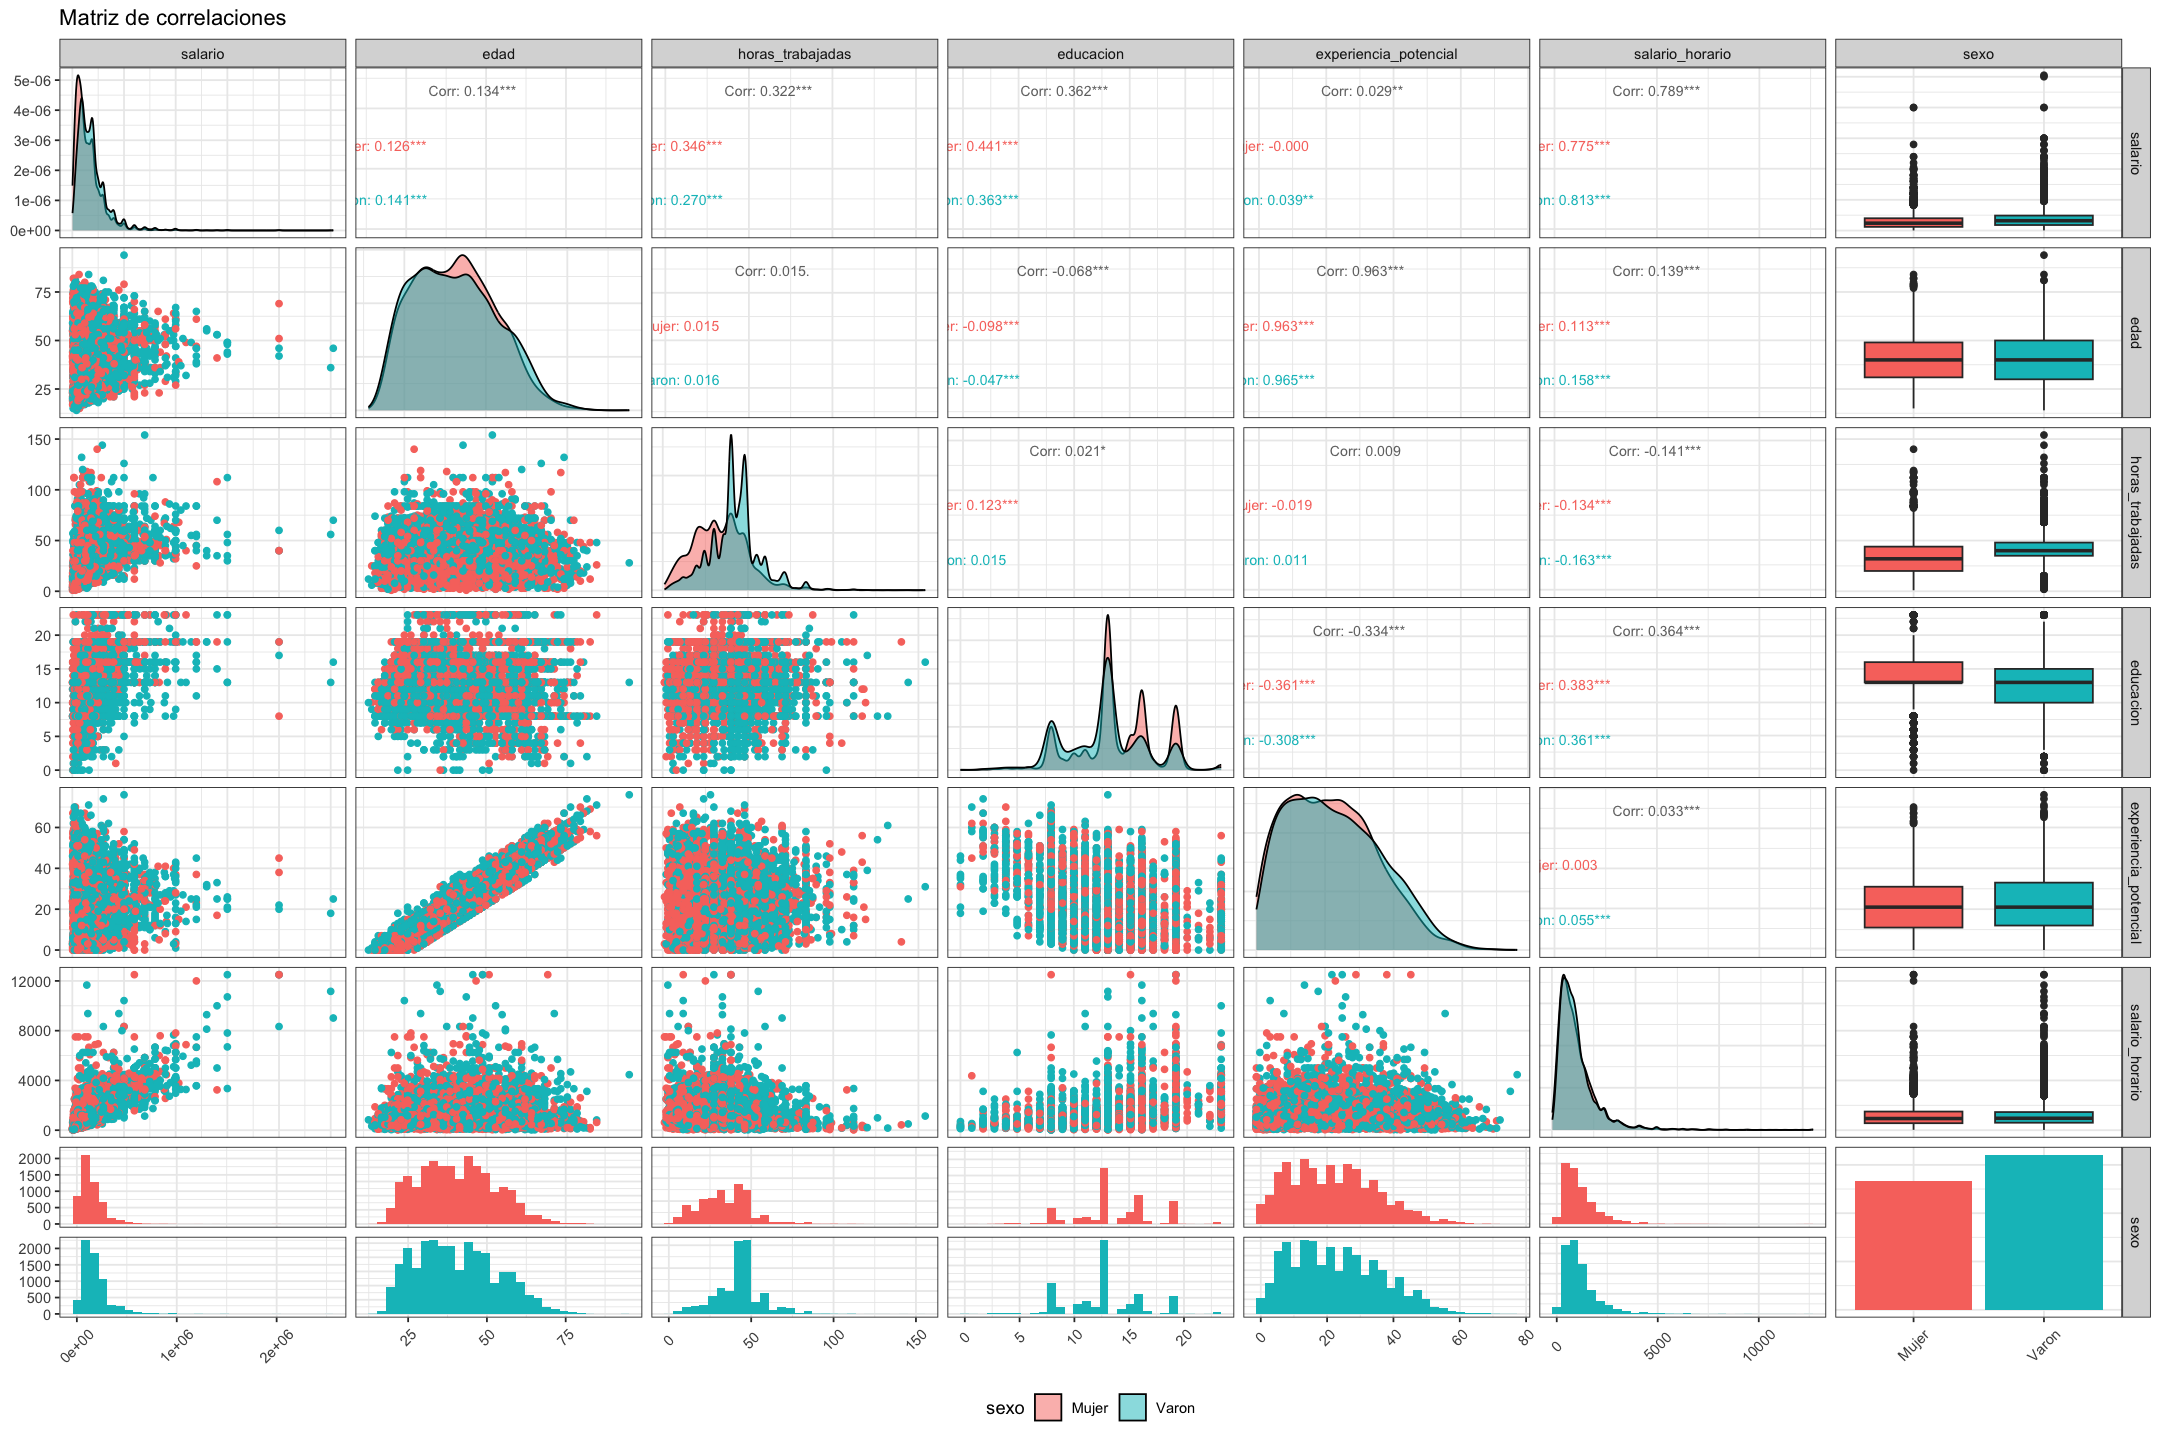

In [34]:
# Ajustar el tamaño del gráfico en Jupyter Lab
options(repr.plot.width = 18, repr.plot.height = 12)

data_numerica <- data %>% select(.,
                                 salario,
                                 edad, 
                                 horas_trabajadas, 
                                 educacion,
                                 experiencia_potencial, 
                                 salario_horario,
                                 sexo
                                )

ggpairs(
    data_numerica, 
    mapping = aes(colour = sexo), 
    title = "Matriz de correlaciones",
    diag = list(continuous = wrap("densityDiag", alpha = 0.5)),
    upper = list(continuous = wrap("cor", size = 3, hjust=0.8, align_percent=0.15)), legend = 25) + 
    theme_bw() +
    theme(axis.text.x = element_text(angle=45, vjust=0.5), legend.position = "bottom") 

In [71]:
# Modelo Lineal Simple experiencia_potencial

lm_exp = lm(formula = salario_horario ~ experiencia_potencial, data = data)
summary(lm_exp)


Call:
lm(formula = salario_horario ~ experiencia_potencial, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1232.5  -603.3  -235.5   294.4 11314.4 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           1133.3613    17.4273  65.034  < 2e-16 ***
experiencia_potencial    2.3743     0.6682   3.554 0.000382 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 970.8 on 11770 degrees of freedom
Multiple R-squared:  0.001072,	Adjusted R-squared:  0.0009868 
F-statistic: 12.63 on 1 and 11770 DF,  p-value: 0.0003816


In [64]:
# Modelo lineal multiple experiencia_potencial ^ 2

lm_exp_2 = lm(formula = salario_horario ~ experiencia_potencial + I(experiencia_potencial^2), data = data)
summary(lm_exp_2)


Call:
lm(formula = salario_horario ~ experiencia_potencial + I(experiencia_potencial^2), 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1236.6  -592.9  -237.2   283.7 11357.1 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                913.5340    25.9187   35.25   <2e-16 ***
experiencia_potencial       26.9662     2.2559   11.95   <2e-16 ***
I(experiencia_potencial^2)  -0.4860     0.0426  -11.41   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 965.5 on 11769 degrees of freedom
Multiple R-squared:  0.012,	Adjusted R-squared:  0.01183 
F-statistic: 71.45 on 2 and 11769 DF,  p-value: < 2.2e-16


In [57]:
# Modelo lineal múltiple

lm_m = lm(formula = salario_horario ~ educacion + experiencia_potencial + I(experiencia_potencial^2) + sexo  + sexo * educacion, data = data)
summary(lm_m)


Call:
lm(formula = salario_horario ~ educacion + experiencia_potencial + 
    I(experiencia_potencial^2) + sexo + sexo * educacion, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2360.7  -498.2  -161.5   276.2 11803.6 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -834.37294   57.03592 -14.629  < 2e-16 ***
educacion                   118.40310    3.57169  33.150  < 2e-16 ***
experiencia_potencial        23.98889    2.07268  11.574  < 2e-16 ***
I(experiencia_potencial^2)   -0.22715    0.03952  -5.747 9.29e-09 ***
sexoVaron                   225.41935   63.60258   3.544 0.000395 ***
educacion:sexoVaron          -6.44928    4.61727  -1.397 0.162509    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 886.6 on 11766 degrees of freedom
Multiple R-squared:  0.1671,	Adjusted R-squared:  0.1668 
F-statistic: 472.2 on 5 and 11766 DF,  p-value: < 2.2e-16


In [59]:
# Modelo de Mincer “enriquecido”

lm_m_e = lm(formula = log(salario_horario) ~ educacion + experiencia_potencial + 
             I(experiencia_potencial^2) + sexo + 
             sexo * educacion, data = data)
summary(lm_m_e)


Call:
lm(formula = log(salario_horario) ~ educacion + experiencia_potencial + 
    I(experiencia_potencial^2) + sexo + sexo * educacion, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4784 -0.3808  0.0347  0.4187  3.0286 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 5.145e+00  4.176e-02 123.227  < 2e-16 ***
educacion                   9.630e-02  2.615e-03  36.830  < 2e-16 ***
experiencia_potencial       2.399e-02  1.517e-03  15.810  < 2e-16 ***
I(experiencia_potencial^2) -2.927e-04  2.893e-05 -10.115  < 2e-16 ***
sexoVaron                   2.804e-01  4.656e-02   6.023 1.77e-09 ***
educacion:sexoVaron        -1.154e-02  3.380e-03  -3.415  0.00064 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6491 on 11766 degrees of freedom
Multiple R-squared:  0.1936,	Adjusted R-squared:  0.1933 
F-statistic:   565 on 5 and 11766 DF,  p-value: < 2.2e-16
